# <center> Project 3 </center>

#### Importing required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Converting the data to data frame

In [2]:
df = pd.read_csv("/kaggle/input/assignment3-data/data_project3.csv")
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.01%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.01%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8.00E-06,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.01%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.01%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


#### # of rows and columns in data

In [3]:
print("The total observations in data(rows) is",df.shape[0],end=".\n")
print("The total features in data(columns) is",df.shape[1],end=".")

The total observations in data(rows) is 40000.
The total features in data(columns) is 101.

#### Information about the data set

<span style="color:blue">**Finding # of categorical variables**</span>

In [4]:
categorical_feature = []
for feature in df.columns:
    if df[feature].dtype == "O":
        categorical_feature.append(feature)
        
    
print("Features with object data-type:",categorical_feature)

Features with object data-type: ['x3', 'x7', 'x19', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99']


<span style="color:blue">**Data frame with only categorical features**</span>

In [5]:
df[categorical_feature]

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.01%,($908.65),female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.01%,"($1,864.96)",male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8.00E-06,($543.19),male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.01%,($182.63),male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.01%,$967.01,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Sun,-0.01%,"$3,750.52",female,no,NaN,5-10 miles,July,farmers,NaN,no,yes
39996,Thursday,0.01%,$448.87,male,yes,Illinois,5-10 miles,July,progressive,ford,no,yes
39997,Monday,-0.02%,$834.96,male,yes,NaN,5-10 miles,August,geico,ford,no,yes
39998,Tuesday,1.00E-06,($48.10),male,no,Ohio,5-10 miles,December,farmers,NaN,no,yes


<span style="color:blue">**Contents of the categorical features in the given dataset**</span>

In [6]:
for feature in categorical_feature:
    print(feature,":",df[feature].unique())

x3 : ['Wed' 'Friday' 'Thursday' 'Tuesday' 'Sunday' 'Saturday' 'Sat' 'Wednesday'
 'Sun' 'Tue' 'Thur' 'Monday' 'Fri' 'Mon']
x7 : ['0.01%' '-8.00E-06' '-0.01%' '0.02%' '0.00%' '-2.00E-06' '-0.02%'
 '2.00E-06' '6.00E-06' '-3.00E-06' '5.00E-06' '0.03%' '-1.00E-06'
 '3.00E-06' '1.00E-06' '9.00E-06' '-9.00E-06' '4.00E-06' '-6.00E-06'
 '-0.03%' '7.00E-06' '0%' '-7.00E-06' '-5.00E-06' '8.00E-06' '-4.00E-06'
 '-0.04%' '0.04%']
x19 : ['($908.65)' '($1,864.96)' '($543.19)' ... '$834.96 ' '($48.10)' '$96.00 ']
x24 : ['female' 'male' nan]
x31 : ['no' 'yes']
x33 : ['Colorado' 'Tennessee' 'Texas' 'Minnesota' 'New York' 'Florida'
 'Nebraska' 'California' nan 'North Dakota' 'Arizona' 'Alabama' 'Ohio'
 'Pennsylvania' 'Iowa' 'Indiana' 'Vermont' 'Arkansas' 'Massachusetts'
 'Illinois' 'Georgia' 'West Virginia' 'Connecticut' 'Virginia'
 'North Carolina' 'Montana' 'New Mexico' 'New Hampshire' 'Michigan' 'DC'
 'Washington' 'Louisiana' 'Kentucky' 'Utah' 'Missouri' 'Oregon' 'Oklahoma'
 'Nevada' 'Wisconsin' 'New 

<span style="color:red">**NOTE:** The  values of  <u>**'x19'**</u> feature is showing continuous pattern but the values are not in numeral format but in string format so converting the values to numeric format.</span>

In [7]:
def string_to_numeric(value):
        value_new = value.replace('$','').replace('(','').replace(')','').replace(',','')
        value_new_float = float(value_new)
        return value_new_float

In [8]:
df['x19'] = df['x19'].apply(lambda x: string_to_numeric(x))

<span style="color:green">**column <u>'x19'</u> converted to numeric feature**</span>

In [9]:
df['x19'].dtype

dtype('float64')

<span style="color:red"> Besides <u> **'x19'** </u> the values of <u> **'x7'** </u> feature is showing continuous pattern but the values are not in numeral format but in string format so converting the values to numeric format.

In [10]:
##function to convert string to float
def convert_to_float(x):
    if x.endswith('%'):
        x = x[:-1] 
        return float(x)
    elif 'E-06' in x:
        coefficient, exponent = x.split('E-06')
        return float(coefficient) * 10**-6
    elif 'E-05' in x:
        coefficient, exponent = x.split('E-05')
        return float(coefficient) * 10**-5
    elif 'E-04' in x:
        coefficient, exponent = x.split('E-04')
        return float(coefficient) * 10**-4
    elif x == '0':
        return 0.0
    else:
        return float(x)

In [11]:
##applying the convert_to_float function
df['x7'] = df['x7'].apply(lambda x: convert_to_float(x))

<span style="color:green">**column <u>'x7'</u> converted to numeric feature**</span>

In [12]:
df['x7'].dtype

dtype('float64')

<span style="color:red">**NOTE:** The  <u>**'x3'**</u>  variable has values of days of week. But some days are spelled fully and some days spelled shortly using only first 3 characters. Example there is an entry 'Wed' as well as 'Wednesday'. Both the values mean same thing but for the machine learning model both the values are different. Converting all the short names of the days to its full name.</span>

In [13]:
weekday_mapping = {
    'Mon': 'Monday',
    'Tue': 'Tuesday',
    'Wed': 'Wednesday',
    'Thu': 'Thursday',
    'Thur': 'Thursday',
    'Fri': 'Friday',
    'Sat': 'Saturday',
    'Sun': 'Sunday'
}

In [14]:
df['x3'] = df['x3'].apply(lambda x: weekday_mapping[x] if x in weekday_mapping else x)

<span style="color:green">**The days spelled shortly have been mapped to full spellings**</span>

In [15]:
df['x3'].value_counts()

x3
Wednesday    6973
Tuesday      6863
Monday       6344
Friday       5595
Saturday     5383
Thursday     4434
Sunday       4408
Name: count, dtype: int64

<span style="color:blue">**New list of categorical features**</span>

In [16]:
categorical_feature_new = []
for feature in df.columns:
    if df[feature].dtype == "O":
        categorical_feature_new.append(feature)
        
    
print("Features with object data-type:",categorical_feature_new)

Features with object data-type: ['x3', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99']


#### Plotting categorical variables with missing values

<Axes: >

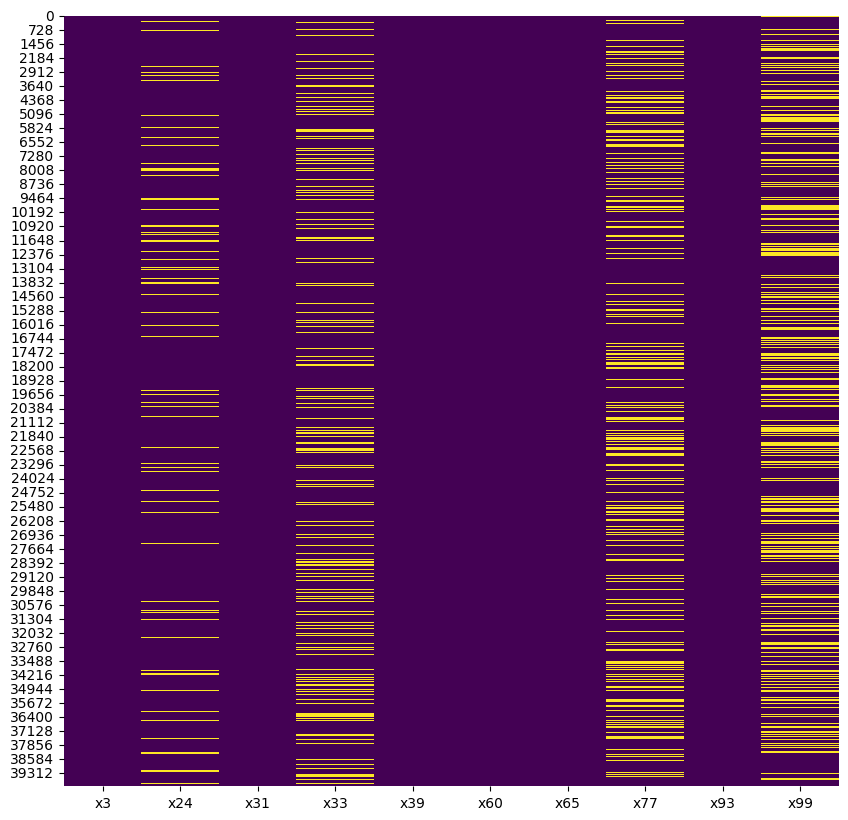

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df[categorical_feature_new].isnull(),cbar=False,cmap='viridis')

### Observation
- We can see that 4 variables have missing values.
- Those features are given below

In [18]:
#Finding features and the percentage of missing values each has
cat_feature_with_missing=[]
for feature in categorical_feature_new:
    if df[feature].isnull().sum()>0:
        print(feature,":",df[feature].isnull().sum()/len(df)*100,end=" %\n")
        cat_feature_with_missing.append(feature)

x24 : 9.64 %
x33 : 17.9275 %
x77 : 23.1425 %
x99 : 32.09 %


In [19]:
cat_feature_with_missing

['x24', 'x33', 'x77', 'x99']

<span style="color:blue">**Numerical feature**</span>

In [20]:
numerical_feature = []
for feature in df.columns:
    if df[feature].dtype != "O":
        numerical_feature.append(feature)

<span style="color:blue">**Plotting numeric features with missing values**</span>

<Axes: >

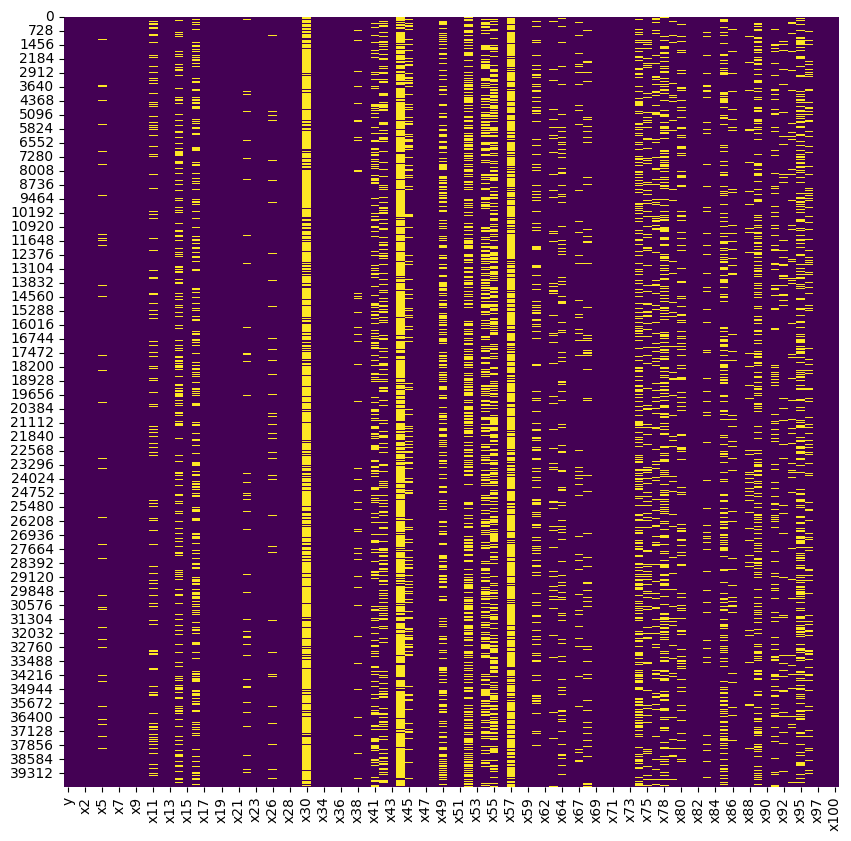

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numerical_feature].isnull(),cbar=False,cmap='viridis')

In [22]:
#Finding features and the percentage of missing values each has
for feature in numerical_feature:
    if df[feature].isnull().sum()>0:
        print(feature,":",df[feature].isnull().sum()/len(df)*100,end=" %\n")

x5 : 6.069999999999999 %
x11 : 12.775 %
x14 : 24.66 %
x16 : 28.03 %
x22 : 5.9675 %
x26 : 6.0825 %
x30 : 80.84 %
x38 : 6.005 %
x41 : 23.7575 %
x42 : 24.322499999999998 %
x44 : 85.6175 %
x45 : 20.022499999999997 %
x49 : 32.0575 %
x52 : 40.455000000000005 %
x54 : 31.819999999999997 %
x55 : 44.24 %
x57 : 81.16 %
x61 : 18.232499999999998 %
x63 : 6.05 %
x64 : 12.7525 %
x67 : 6.0625 %
x68 : 5.96 %
x74 : 32.29 %
x75 : 13.112499999999999 %
x76 : 13.1225 %
x78 : 28.4325 %
x79 : 6.075 %
x80 : 13.139999999999999 %
x83 : 6.069999999999999 %
x85 : 24.2875 %
x86 : 6.0175 %
x88 : 5.8275 %
x89 : 26.7275 %
x91 : 13.1475 %
x92 : 6.0874999999999995 %
x94 : 5.8500000000000005 %
x95 : 31.509999999999998 %
x96 : 16.595 %


<span style="color:red">**NOTE:** The features <u>**'x30', 'x44'**</u> and <u>**'x57'**</u> have more than <u> **80%**</u> missing values so will drop these columns for rest of the columns and will impute the missing values for the rest of the features.</span>

In [23]:
##dropping the variables with >80% missing values
df = df.drop(['x30','x44','x57'],axis=1)

#### Now we are left with 98 features including the target variable out of 101 features.

In [24]:
df.shape

(40000, 98)

### Imputing Categorical and Numerical features using <u>MICE</u> imputation

- <u>**Reduces bias:**</u><br> 
By imputing missing values multiple times and combining the results, MICE reduces the amount of bias that is introduced into the data. 

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Steps followed before imputation on categorical varibales

- <u>**Step 1:**</u> : First sliced the dataframe with categorical variables.
- <u>**Step 2:**</u> : Label encoded the non-null values in the categorical variables keeping the null values intact.
- <u>**Step 3:**</u> : Categorical features ready for imputation.

In [26]:
## Encoding the categorical feature because MICE imputation works only on numerical features
from sklearn.preprocessing import LabelEncoder
# Label encode non-null values
label_encode = {}
for feature in categorical_feature_new:
    label_encode[feature] = LabelEncoder()
    df.loc[df[feature].notnull(), feature] = label_encode[feature].fit_transform(df.loc[df[feature].notnull(), feature])
# Replace NaN values back into the dataframe
df = df.where(df.notnull(), np.nan)   

In [27]:
#imputing the whole dataset
imputer_all = IterativeImputer()
df_imputed = pd.DataFrame(imputer_all.fit_transform(df), columns=df.columns)

## <center> <span style="color:green"> IMPUTATION DONE SUCCESSFULLY! </span>  </center>

In [28]:
df_imputed.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0.0,0.165254,18.060003,6.0,1.077380,-1.339233,-1.584341,0.010000,0.220784,1.816481,...,-0.397427,0.909479,0.0,5.492487,-1.216012,10.255579,7.627730,0.0,0.0,104.251338
1,1.0,2.441471,18.416307,0.0,1.482586,0.920817,-0.759931,0.010000,1.192441,3.513950,...,0.656651,9.093466,0.0,3.346429,4.321172,7.773795,10.505284,1.0,0.0,101.230645
2,1.0,4.427278,19.188092,4.0,0.145652,0.366093,0.709962,-0.000008,0.952323,0.782974,...,2.059615,0.305170,0.0,4.456565,-0.788163,8.754572,7.810979,0.0,0.0,109.345215
3,0.0,3.925235,19.901257,5.0,1.763602,-0.251926,-0.827461,-0.010000,-0.520756,1.825586,...,0.899392,5.971782,0.0,4.100022,1.151085,8.268594,9.178325,1.0,0.0,103.021970
4,0.0,2.868802,22.202473,3.0,3.405119,0.083162,1.381504,0.010000,-0.732739,2.151990,...,3.003595,1.046096,1.0,3.234033,2.074927,9.987006,11.702664,0.0,0.0,92.925935


In [29]:
count = 0
for feature in df_imputed.columns:
    if df_imputed[feature].isnull().sum() != 0:
        count += 1
        
if count>0:
    print("**There are features with missing values.**")
else:
    print("'\033[1m'There are no features with missing values!!!'\033[0m'")
    

''There are no features with missing values!!!''


## <center> <span style="color:purple"> Zero missing values! 😄 </span>  </center> 

### The proportion of each class in the target variable 'y'.

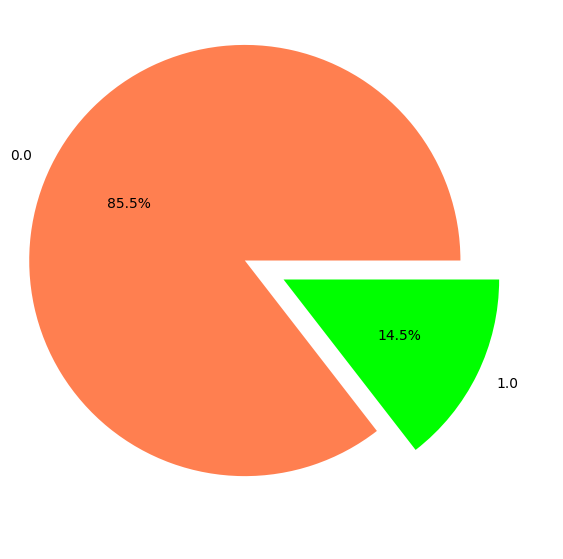

In [30]:
#Proportion of 0 and 1 in target column
plt.figure(figsize=(7,7))
y_counts = df_imputed["y"].value_counts()
labels = y_counts.index
sizes = y_counts.values
colors = ["coral","lime"]
plt.pie(sizes,labels=labels,colors=colors,explode=(0.2,0),autopct='%1.1f%%');

#### Observations
- **1:** The data is imbalanced as the classes in the target variable 'y' does not have equal proportions.
- **2:** The target variable 'y 'dataset comprises 85.5% of class '0' whereas class '1' only 14.5%.

### Data Preparation for model building

In [31]:
# Separating the target feature and independent features
X = df_imputed.drop('y',axis=1)
y = df_imputed['y']

In [32]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, shuffle=True)

In [33]:
X_train.shape,X_test.shape

((28000, 97), (12000, 97))

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, pred_train)
    test_accuracy = accuracy_score(y_test, pred_test)
    
    train_precision = precision_score(y_train, pred_train)
    test_precision = precision_score(y_test, pred_test)
    
    train_recall = recall_score(y_train, pred_train)
    test_recall = recall_score(y_test, pred_test)

    train_f1_score = f1_score(y_train, pred_train)
    test_f1_score = f1_score(y_test, pred_test)

    # Adding all scores in the list
    score_list.extend((train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1_score, test_f1_score))

    # If the flag is set to True then only the following print statements will be displayed, the default value is True
    if flag:
        train_table = pd.DataFrame({
            "\033[1mAccuracy\033[0m" : train_accuracy,
            "\033[1mPrecision\033[0m" : train_precision,
            "\033[1mRecall\033[0m" :train_recall,
            "\033[1mF1 score\033[0m" : train_f1_score
        },
        index=[0]
        )
        print("\033[1mTraining Performance:\033[0m\n",train_table)
   
        test_table = pd.DataFrame({
            "\033[1mAccuracy\033[0m" : test_accuracy,
            "\033[1mPrecision\033[0m" : test_precision,
            "\033[1mRecall\033[0m" :test_recall,
            "\033[1mF1 score\033[0m" : test_f1_score
        },
        index=[0]
        )
        print("\033[1mTesting Performance:\033[0m\n",test_table)

    if flag:
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        train_cm = confusion_matrix(y_train, pred_train)
        sns.heatmap(train_cm, annot=True, fmt='d', cmap='Set2', cbar=False, annot_kws={"size": 14})
        plt.title('Confusion Matrix on Training Set')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')

        plt.subplot(1, 2, 2)
        test_cm = confusion_matrix(y_test, pred_test)
        sns.heatmap(test_cm, annot=True, fmt='d', cmap='Set2', cbar=False, annot_kws={"size": 14})
        plt.title('Confusion Matrix on Test Set')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')

        plt.tight_layout()
        plt.show()

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Training Performance:
    Accuracy  Precision  Recall  F1 score
0          0.857464           0.610909        0.081692          0.144113
Testing Performance:
    Accuracy  Precision  Recall  F1 score
0            0.8595           0.507874        0.076331          0.132716


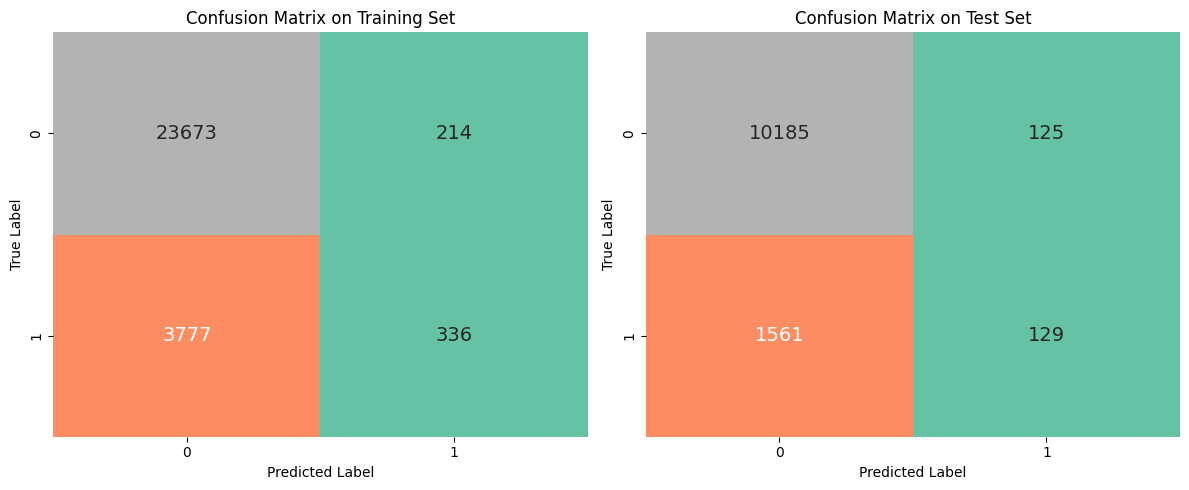

In [36]:
#Scaling the data
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
# Initialize the logistic regression model
logistic_regression_model = LogisticRegression()

# Fit the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Now, you can use the get_model_score function to evaluate the model
get_model_score(logistic_regression_model)

#### Observations:
- The training accuracy is **85.74%** and the test accuracy is **85.95%**.
- The test accuracy is higher but not a significant difference, so can't conclude there is **underfitting** it can be due to **data splitting** or some other factors .
- The training precision is **60.86%** indicating that the 60% predicted positives are actually positive but this value is less for the test set scoring only **50.19%**.
- The training recall is only **8.16%** which is low indicating the model was only able to identify only 8% of the actual positives. The test recall is almost the same as that of the training set scoring **7.69%**.
- The F1 score for training is **14.4%** indicating there is a presence of trade off between precision and recall,similarly for test F1 score which is **13.34%**.
- Confusion matrix indicates the similar information as that of Precision, Recall and F1 score.

### Hyper parameter tuning on Logistic Regression

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Training Performance:
    Accuracy  Precision  Recall  F1 score
0          0.857464           0.610909        0.081692          0.144113
Testing Performance:
    Accuracy  Precision  Recall  F1 score
0            0.8595           0.507874        0.076331          0.132716


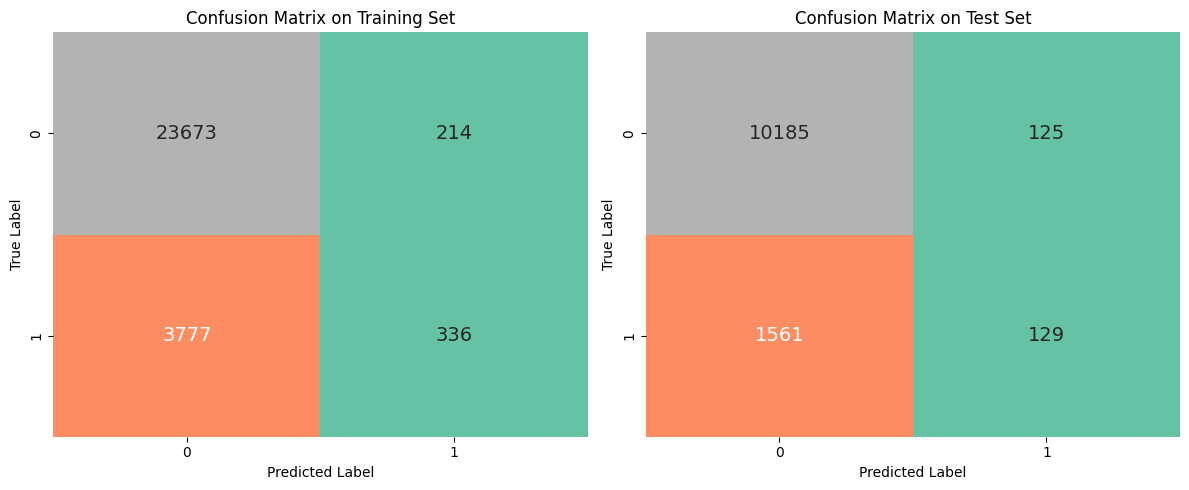

In [37]:
#Importing 'GridSearchCV' from sklearn
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
logistic_regression_tuned = LogisticRegression()

# Define hyperparameters for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform grid search with 5-fold cross-validation
grid_obj = GridSearchCV(estimator=logistic_regression_tuned, param_grid=param_grid, cv=5)
grid_obj=grid_obj.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_obj.best_params_
logistic_regression_tuned = grid_obj.best_estimator_

print("Best Hyperparameters:", best_params)

# Now, you can use the best model to make predictions and evaluate it
best_model_score = get_model_score(logistic_regression_tuned)

#### Observations after hyperparameter tuning:
- The training accuracy is **85.74%** and the test accuracy is **85.95%**.
- The test accuracy is higher but not a significant difference, so can't conclude there is **underfitting** it can be due to **data splitting** or some other factors .
- The training precision is **61.86%** indicating that the 61% predicted positives are actually positive but this value is less for the test set scoring only **50.78%**.
- The training recall is only **8.16%** which is low indicating the model was only able to identify only 8% of the actual positives. The test recall is almost the same as that of the training set scoring **7.69%**.
- The F1 score for training is **14.4%** indicating there is a presence of trade off between precision and recall,similarly for test F1 score which is **13.24%**.
- Confusion matrix indicates the similar information as that of Precision, Recall and F1 score.

**There is not much difference in the scores after the hyper parameter tuning.**

### Random Forest

Training Performance:
    Accuracy  Precision  Recall  F1 score
0          0.999964                1.0        0.999757          0.999878
Testing Performance:
    Accuracy  Precision  Recall  F1 score
0           0.85975           0.769231        0.005917          0.011744


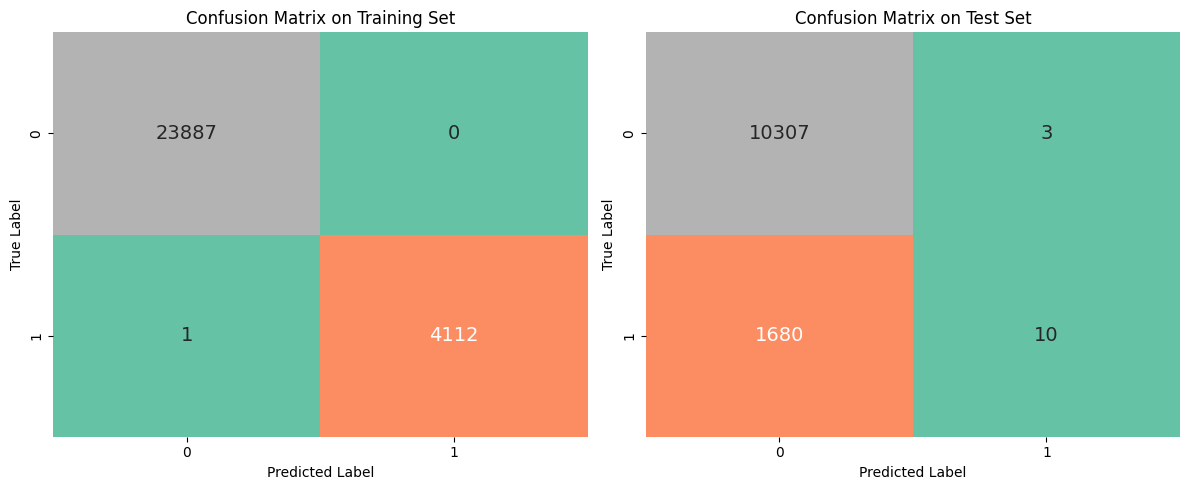

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier()

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# # Now, you can use the trained Random Forest model for prediction
# predictions = random_forest_model.predict(X_test)

get_model_score(random_forest_model)

#### Observations:
- The training accuracy is **99.99%** and the test accuracy is **85.975%**.
- The training precision is **100%** indicating that the all predicted positives are actually positive but this value is less for the test set scoring only **76.92%**.
- The training recall is  **99.97%** which is pretty high indicating the model was  able to identify 99% of the actual positives. The test recall is only **0.59%** which is pretty low compared to the training recall.
- The F1 score for training is **99.98%** which is quite fine while test F1 score is **1.14%**. indicating there is a presence of trade off between precision and recall. 
- The testing performance metrics show a significant drop in performance compared to the training data. While accuracy is still relatively high, indicating that the model makes correct predictions for a large portion of the testing data, the precision, recall, and F1 score are considerably lower.
- The model is overfitting the training data but performing poorly for the testing data.
- Confusion matrix indicates the similar information as that of Precision, Recall and F1 score.

### Feature Importance 

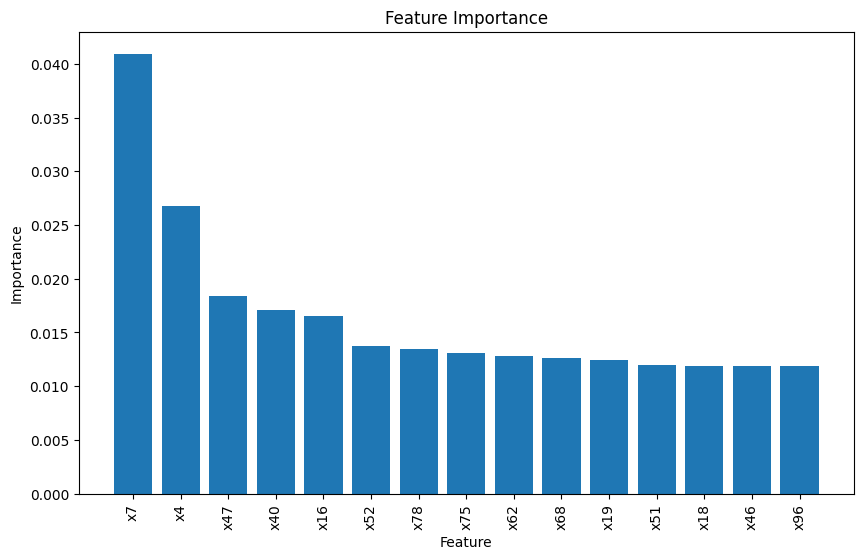

In [39]:
# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1][:15]
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(15),feature_importances[sorted_indices], align='center')
plt.xticks(range(15), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

#### Observations:
- From the plot we can say **'x7'** and **'x4'** contributes significantly to the random forest predictive model. The contribution percentage is **4.1%** and **2.75%** for **'x7'** and **'x4'** respectively.So, for the predictive model these two features are highly important.
- Features like **'x47'**,**'x40'**, and **'x16'**, are moderately important as they contribute ranging from **1.65%** to **1.85%** . 
- Although rest of the features contribute only **1.25%** , they are important too because even if their individual contribution is less but collectively they contribute substantially to the predictive model.
- From the plot, we can conclude that there is room for feature selection or dimensionality reduction.

#### Hyperparameter tuning for Random Forest

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Training Performance:
    Accuracy  Precision  Recall  F1 score
0          0.996107                1.0        0.973499          0.986571
Testing Performance:
    Accuracy  Precision  Recall  F1 score
0          0.859583           0.571429        0.011834          0.023188


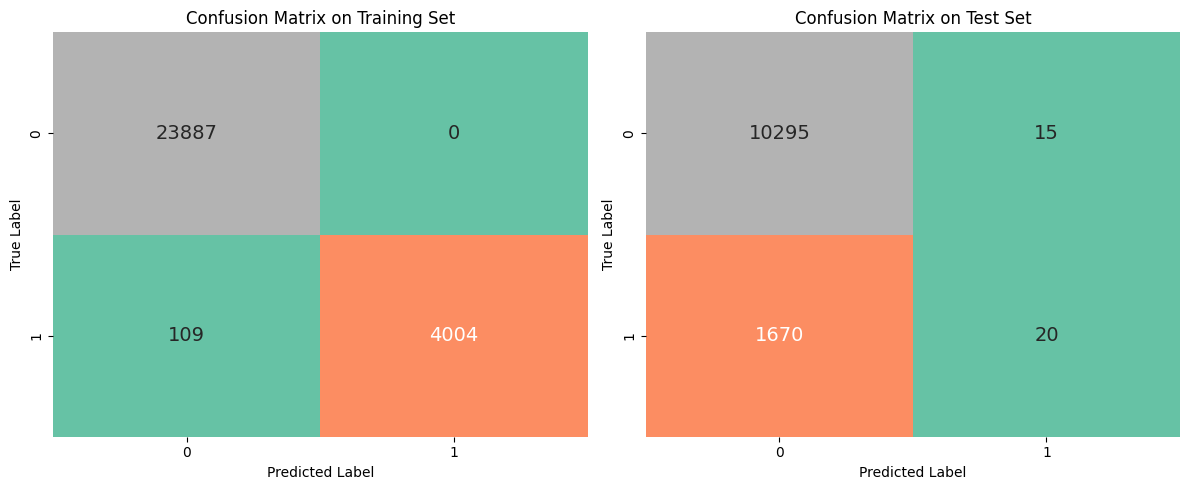

In [40]:
random_forest_tuned = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_obj = GridSearchCV(estimator=random_forest_tuned, param_grid=param_grid, cv=5, n_jobs=-1)
grid_obj=grid_obj.fit(X_train, y_train)

best_params = grid_obj.best_params_
random_forest_tuned = grid_obj.best_estimator_

print("Best Hyperparameters:", best_params)

# Now, you can use the best model to make predictions and evaluate it
best_model_score = get_model_score(random_forest_tuned)

#### Observations after hyperparameter tuning:
- The training accuracy is **99.61%** and the test accuracy is **85.958%**.
- The training precision is **100%** indicating that the all predicted positives are actually positive but this value is less for the test set scoring only **57.14%** worsoned after tuning.
- The training recall is  **97.34%** which is pretty high indicating the model was  able to identify 97% of the actual positives. After tuning, the test recall improved to **1.18%** from **0.59%** which is not that significant.
- The F1 score for training is **98.65%** which is quite fine while test F1 score is **2.31%** , little improvement from **1.14%** after tuning. 
- The testing performance metrics show a significant drop in performance compared to the training data. While accuracy is still relatively high, indicating that the model makes correct predictions for a large portion of the testing data, the precision, recall, and F1 score are considerably lower.
- The model is overfitting the training data but performing poorly for the testing data.
- Confusion matrix indicates the similar information as that of Precision, Recall and F1 score.
#### **There is not much difference in the scores after the hyper parameter tuning.**

#### Feature Importance of tuned Random Forest

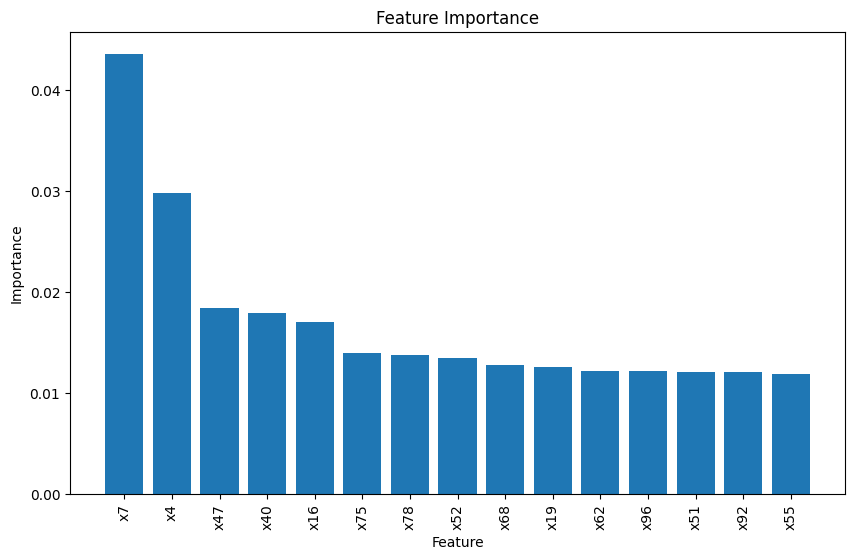

In [41]:
# Get feature importances
feature_importances = random_forest_tuned.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1][:15]
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(15),feature_importances[sorted_indices], align='center')
plt.xticks(range(15), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

#### Observations:
- From the plot we can say **'x7'** and **'x4'** contributes significantly to the tuned random forest  predictive model. The contribution percentage increased **4.5%** and **2.99%** from **4.1%** and **2.75%** for **'x7'** and **'x4'** respectively.  After tuning too these two features remains highly important.
- Features like **'x47'**,**'x40'**, and **'x16'** are moderately important.Their contribution too increased from the range of **1.65%** to **1.85%** to **1.95%** to **1.85%** . 
- Although rest of the features contribution also increased from **1.25%** to **1.5%** its not significant. These features are important too because even if their individual contribution is less but collectively they contribute substantially to the predictive model.
- From the plot, we can conclude that there is room for feature selection or dimensionality reduction.

### XgBoost

Training Performance:
    Accuracy  Precision  Recall  F1 score
0          0.969964           0.992178        0.801848          0.886917
Testing Performance:
    Accuracy  Precision  Recall  F1 score
0          0.857917           0.487437        0.172189          0.254482


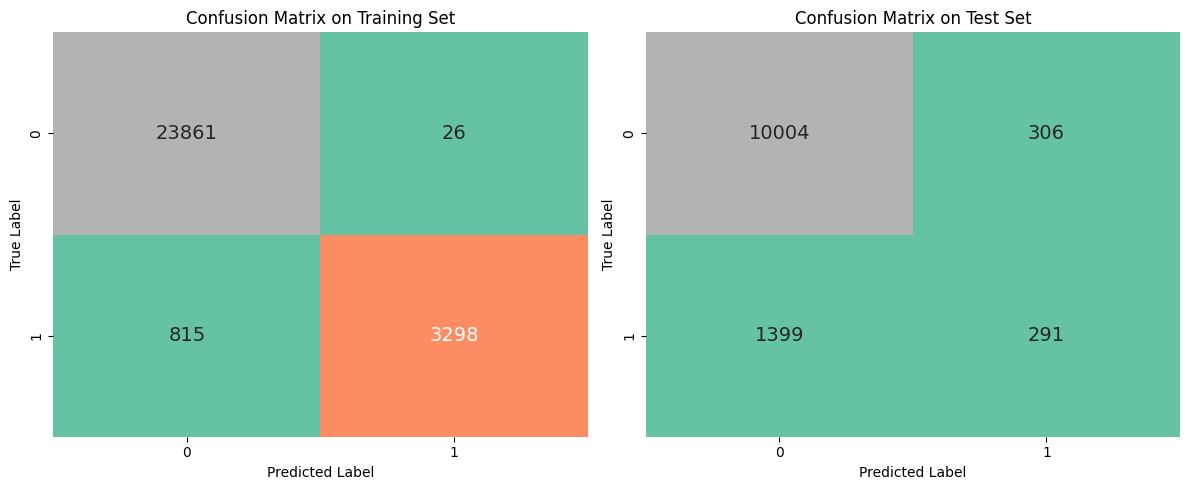

In [42]:
from xgboost import XGBClassifier
# Initializing the XGBoost classifier
xg_boost_model = XGBClassifier()

# Training the classifier
xg_boost_model.fit(X_train, y_train)

get_model_score(xg_boost_model)

#### Observations:
- The training accuracy is **96.99%** and the test accuracy is **85.79%**.
- The training precision is **99.21%** indicating that the all predicted positives are actually positive but this value is less for the test set scoring only **48.74%**.
- The training recall is  **80.18%** which is pretty high indicating the model was  able to identify 80% of the actual positives. The test recall is only **17.21%** which is pretty low compared to the training recall.
- The F1 score for training is **88.69%** which is quite fine while test F1 score is **25.44%**. indicating there is a presence of trade off between precision and recall. 
- The testing performance metrics show a significant drop in performance compared to the training data. While accuracy is still relatively high, indicating that the model makes correct predictions for a large portion of the testing data, the precision, recall, and F1 score are considerably lower.
- The model is overfitting the training data but performing poorly for the testing data.
- Confusion matrix indicates the similar information as that of Precision, Recall and F1 score.

#### Feature Importance of Xgboost

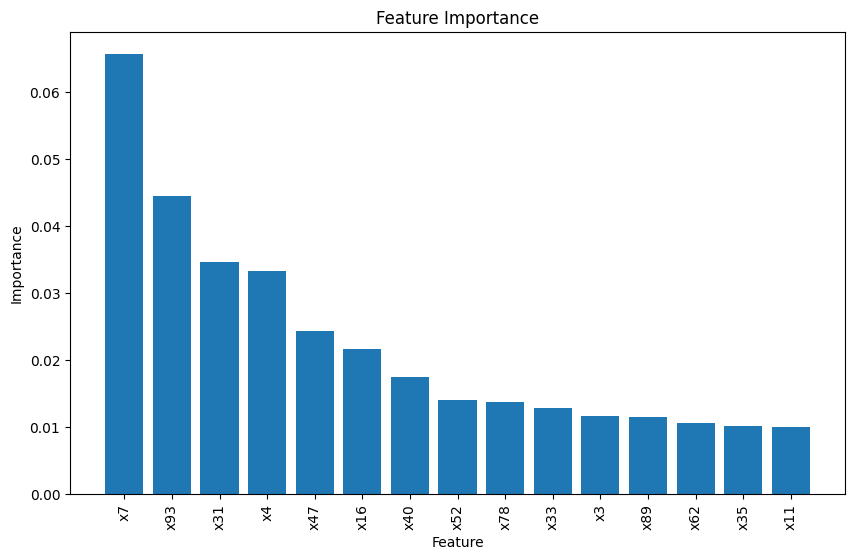

In [43]:
# Get feature importances
feature_importances = xg_boost_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1][:15]
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(15),feature_importances[sorted_indices], align='center')
plt.xticks(range(15), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

#### Observations:
- From the plot we can say **'x7'** and **'x93'** contributes significantly to the XgBoost predictive model. The contribution percentage is **6.99%** and **4.5%** for **'x7'** and **'x93'** respectively.So, for the predictive model these two features are highly important.
- Features like **'x31'** and **'x4'** are moderately important as they contribute around **3.5%**. 
- Although rest of the features contribute ranging from **2.8%** to **1.8%** , they are important too because even if their individual contribution is less but collectively they contribute substantially to the predictive model.
- From the plot, we can conclude that there is room for feature selection or dimensionality reduction.

### Shap values of basic XgBoost model

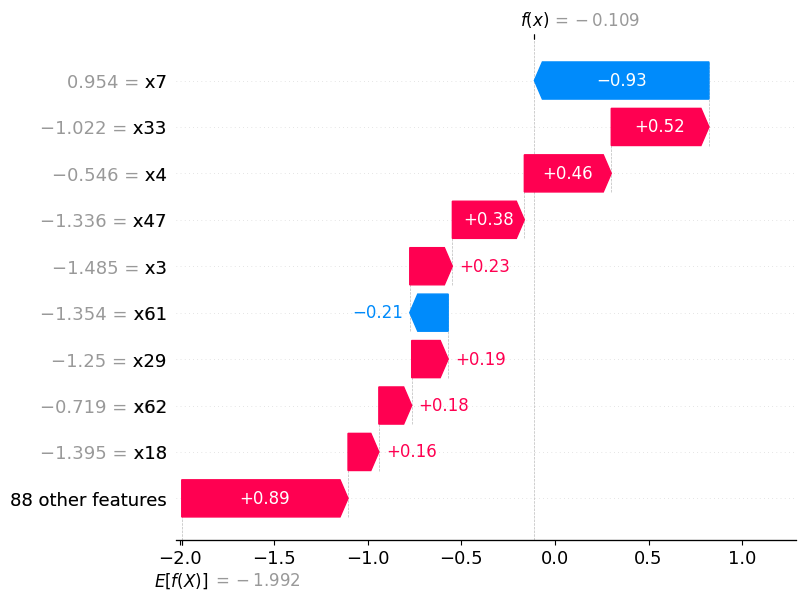

In [44]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(xg_boost_model)

# Calculate SHAP values for all features on the training data
shap_values = explainer.shap_values(X_train)

# Choose the instance you want to visualize (e.g., the first instance)
instance_index = 0

# Create an Explanation object for the chosen instance
shap_explanation = shap.Explanation(
    values=shap_values[instance_index],
    base_values=explainer.expected_value,
    data=X_train.iloc[instance_index, :]
)

# Generate a waterfall plot for the chosen instance
shap.waterfall_plot(shap_explanation)

# Show the plot
plt.show()

#### Observations
- Feature **'x7'** impacts negatively to the probability of the target varibale but this feature is a highly significant one.
- Moderately significant features are **'x33'**,**'x4'** and **'x47'**.
- Rest of the features contribute less individually but offer substantial contribution as a group.

#### Hyperparametertuning for XgBoost

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.8}
Training Performance:
    Accuracy  Precision  Recall  F1 score
0          0.866714           0.699476        0.162412          0.263615
Testing Performance:
    Accuracy  Precision  Recall  F1 score
0           0.86275           0.557641        0.123077          0.201648


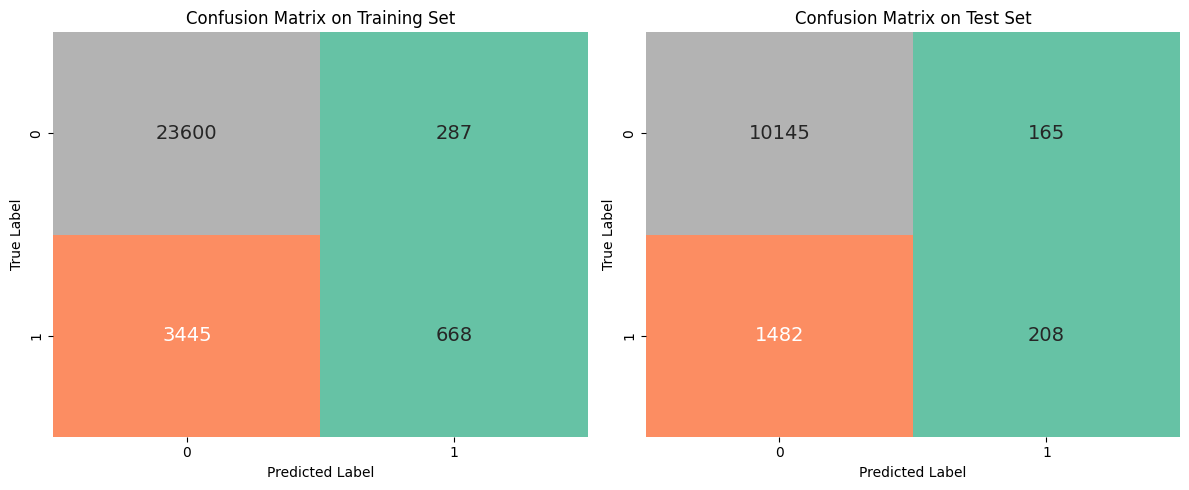

In [45]:
xgb_tuned = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
}

grid_obj = GridSearchCV(estimator=xgb_tuned, param_grid=param_grid, cv=5, n_jobs=-1)
grid_obj=grid_obj.fit(X_train, y_train)

best_params = grid_obj.best_params_
xgb_tuned = grid_obj.best_estimator_

print("Best Hyperparameters:", best_params)

# Now, you can use the best model to make predictions and evaluate it
best_model_score = get_model_score(xgb_tuned)

#### Observations after hyperparameter tuning:
- The training accuracy is **86.67%** and the test accuracy is **86.275%**.
- The training precision is **69.94%** indicating that  all the predicted positives are actually positive but this value is less for the test set scoring only **55.76%** got better after tuning.
- The training recall is  **16.24%** which got worsoned from **80%** after tuning which is pretty high. After tuning, the test recall also degraded to **12.30%** from **17.21%**.
- The F1 score for training is **26.36%** which is quite low while test F1 score is **20.16%** , degraded after tuning. 
- The testing performance metrics show a significant drop in performance compared to the training data. While accuracy is still relatively high, indicating that the model makes correct predictions for a large portion of the testing data, the precision, recall, and F1 score are considerably lower.
- The model is overfitting the training data but performing poorly for the testing data.
- Confusion matrix indicates the similar information as that of Precision, Recall and F1 score.
#### **There is not much difference in the scores after the hyper parameter tuning.**


#### Feauture Importance of tuned Xgboost Model

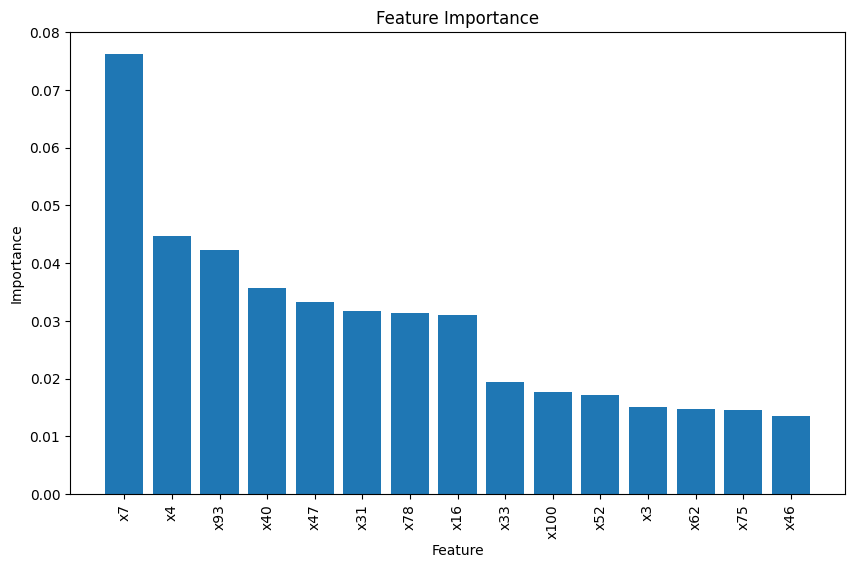

In [46]:
# Get feature importances
feature_importances = xgb_tuned.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1][:15]
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(15),feature_importances[sorted_indices], align='center')
plt.xticks(range(15), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

#### Observations:
- From the plot we can say the sugnificant feature changed to **'x7'** and **'x4'** from **'x7'** and **'x93'** contributing significantly to the tuned XgBoost predictive model. 
- The contribution percentage increased **7.8%** for **'x7'** from **6.99%** .
- Now **'x4'** became highly important feature along with **'x93'** contributing around **4.6%** by each of them to the model.
- Features like **'x40'**,**'x47'**,**'x31'**,**'x78'** and **'x16'** are moderately important as they contribute around **3.2%**. 
- Although rest of the features contribution also increased from **1.0%** to **2.0%** its not significant. These features are important too because even if their individual contribution is less but collectively they contribute substantially to the predictive model.
- From the plot, we can conclude that there is room for feature selection or dimensionality reduction.

#### Shap values of tuned XgBoost

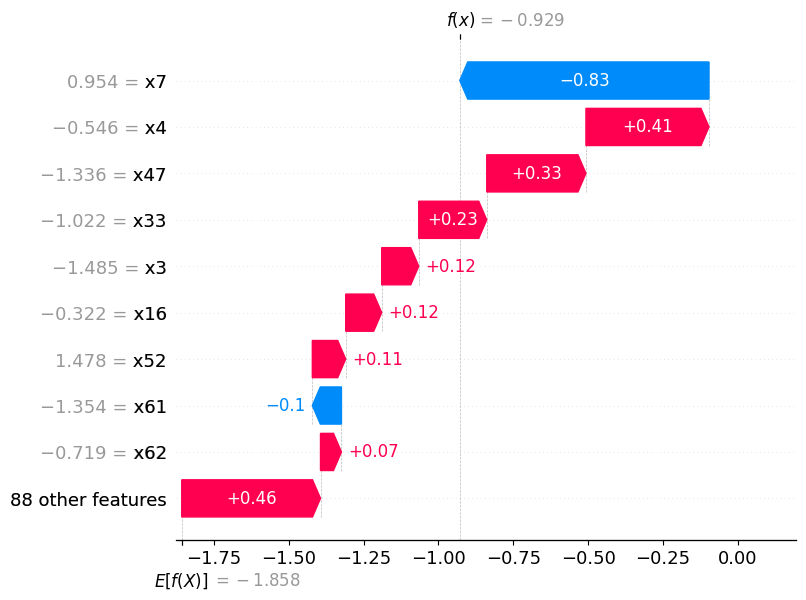

In [47]:

# Create a SHAP explainer object
explainer = shap.Explainer(xgb_tuned)

# Calculate SHAP values for all features on the training data
shap_values = explainer.shap_values(X_train)

# Choose the instance you want to visualize (e.g., the first instance)
instance_index = 0

# Create an Explanation object for the chosen instance
shap_explanation = shap.Explanation(
    values=shap_values[instance_index],
    base_values=explainer.expected_value,
    data=X_train.iloc[instance_index, :]
)

# Generate a waterfall plot for the chosen instance
shap.waterfall_plot(shap_explanation)

# Show the plot
plt.show()

#### Observations
- Feature **'x7'** impacts negatively to the probability of the target varibale but this feature is a highly significant one.
- Moderately significant features are **'x33'**,**'x4'** and **'x47'**.
- Rest of the features contribute less individually but offer substantial contribution as a group.

#### Adaboost 

Training Performance:
    Accuracy  Precision  Recall  F1 score
0          0.856964           0.579646        0.095551          0.164058
Testing Performance:
    Accuracy  Precision  Recall  F1 score
0           0.86075            0.53405        0.088166          0.151346


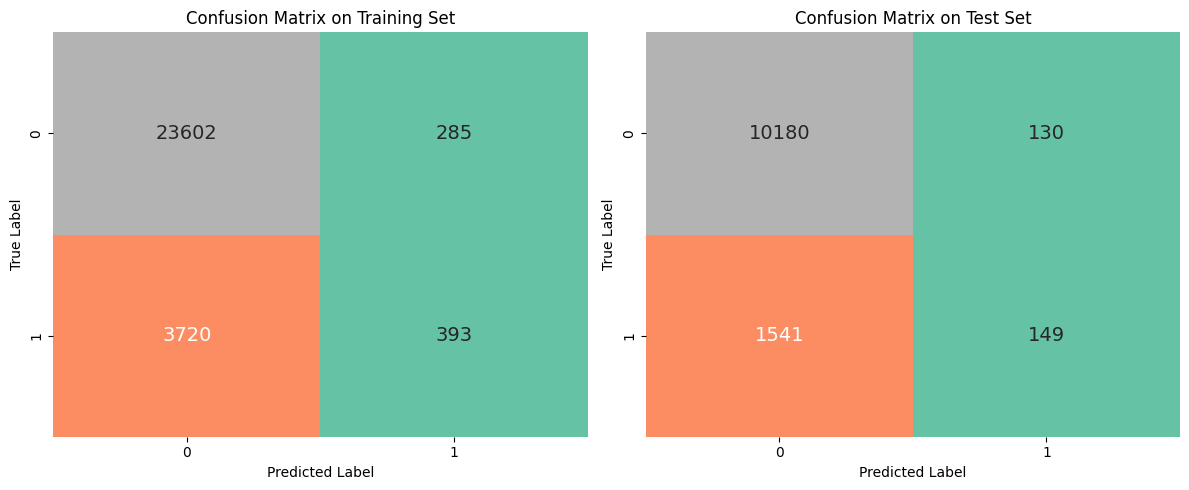

In [48]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_model = AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=100)

# Training the classifier
ada_boost_model.fit(X_train, y_train)

get_model_score(ada_boost_model)

#### Observations:
- The training accuracy is **85.70%%** and the test accuracy is **86.08%%**.
- The training precision is lower scoring only **57.96%%** indicating that this percentage of predicted positives are actually positive but this value is also less for the test set scoring only **53.41%**(almost equal to train score).
- The training recall is  **9.56%%** which is significantly low indicating the model was not able to identify the actual positives. The test recall is much lower only scoring **8.82%%** which is pretty low too.
- The F1 score for training is **16.41%**  and test F1 score is **15.13%**. indicating there is a presence of trade off between precision and recall for train and test.
- The testing performance metrics show a significant drop in performance compared to the training data. While accuracy is still relatively high, indicating that the model makes correct predictions for a large portion of the testing data, the precision, recall, and F1 score are considerably lower.
- The model is overfitting the training data but performing poorly for the testing data.
- Confusion matrix indicates the similar information as that of Precision, Recall and F1 score.

#### Feature Importance of Adaboost

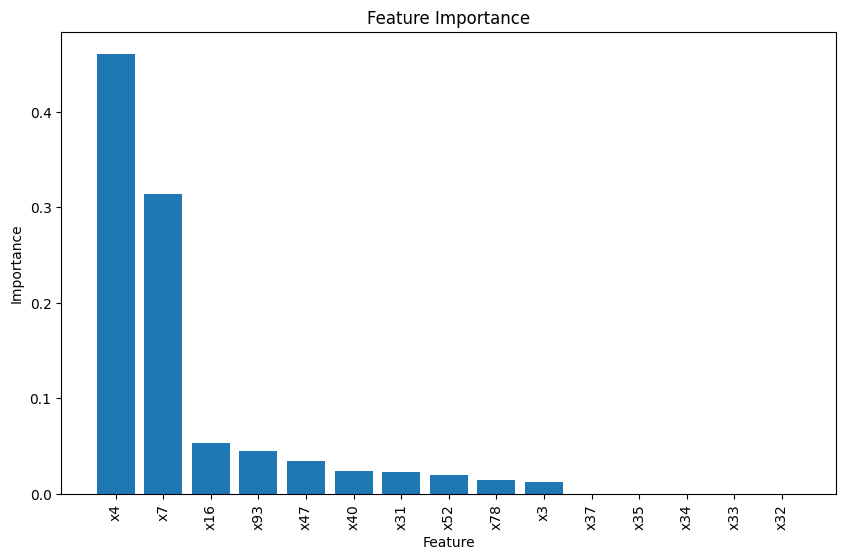

In [49]:
# Get feature importances
feature_importances = ada_boost_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1][:15]
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(15),feature_importances[sorted_indices], align='center')
plt.xticks(range(15), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

#### Observations:
- From the plot we can say **'x4'** and **'x7'** contributes significantly to the AdaBoost predictive model. The contribution percentage is **49.9%** and **32%** for **'x4'** and **'x7'** respectively.So, for the predictive model these two features are highly important.
- Features like **'x16'**, **'x93'** and **'x47'**  are moderately important as they contribute around **5%**. 
- Here rest of the features contribute negligbly..
- From the plot, we can conclude that there is room for feature selection or dimensionality reduction.

#### Hyperparameter tuning for AdaBoost

Best Hyperparameters: {'learning_rate': 0.3, 'n_estimators': 150}
Training Performance:
    Accuracy  Precision  Recall  F1 score
0          0.861929           0.708968        0.101872          0.178146
Testing Performance:
    Accuracy  Precision  Recall  F1 score
0          0.862167           0.576923        0.079882          0.140333


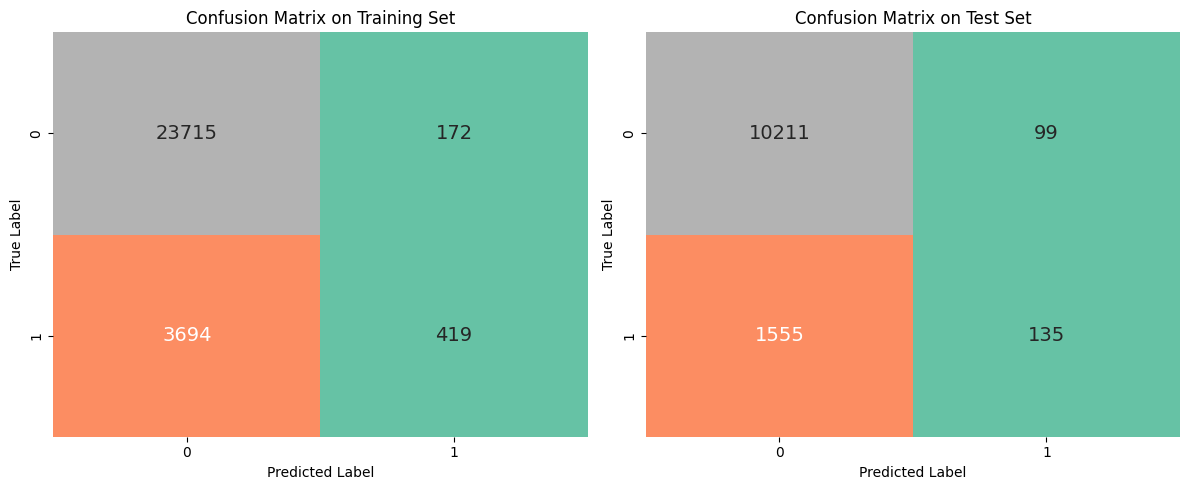

In [50]:
ada_boost_tuned = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3, 1.0]
}

grid_obj = GridSearchCV(estimator=ada_boost_tuned, param_grid=param_grid, cv=5, n_jobs=-1)
grid_obj= grid_obj.fit(X_train, y_train)

best_params = grid_obj.best_params_
ada_boost_tuned = grid_obj.best_estimator_

print("Best Hyperparameters:", best_params)

# Now, you can use the best model to make predictions and evaluate it
best_model_score = get_model_score(ada_boost_tuned)

#### Observations after hyperparameter tuning:
- The training accuracy is **86.19%** and the test accuracy is **86.22%**.
- The training precision is **70.90%** indicating that the predicted positives are actually positive, this value is also less for the test set scoring only **57.69%** got better after tuning.
- The training recall is  **10.19%%** which got improved a little from **9.56%** after tuning not much significant. After tuning, the test recall also degraded to **7.99%%** from **8.82%**.
- The F1 score for training is **17.81%** which is quite low while test F1 score is **14.03%** , degraded after tuning. 
- The testing performance metrics show a significant drop in performance compared to the training data. While accuracy is still relatively high, indicating that the model makes correct predictions for a large portion of the testing data, the precision, recall, and F1 score are considerably lower.
- The model is overfitting the training data but performing poorly for the testing data.
- Confusion matrix indicates the similar information as that of Precision, Recall and F1 score.
#### **There is not much difference in the scores after the hyper parameter tuning.**


#### Feature Importance of tuned Adaboost model

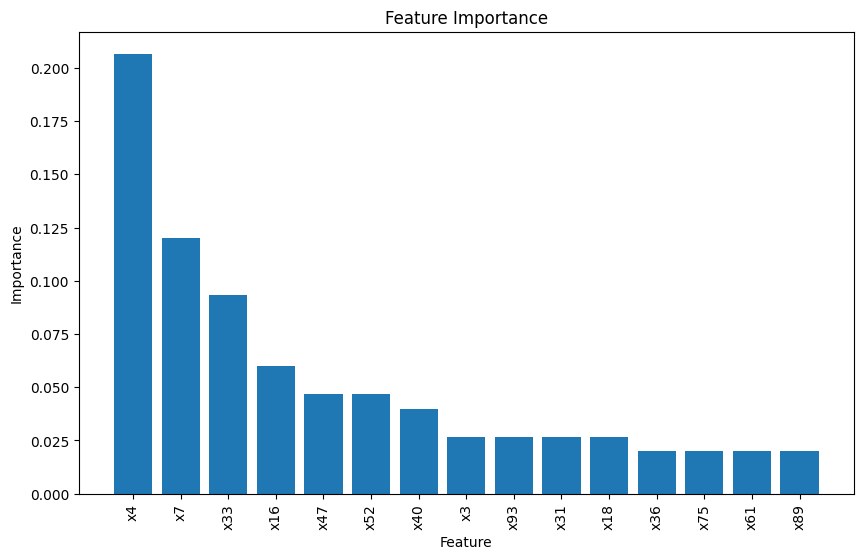

In [51]:
# Get feature importances
feature_importances = ada_boost_tuned.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1][:15]
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(15),feature_importances[sorted_indices], align='center')
plt.xticks(range(15), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

#### Observations:
- From the plot we can say the sugnificant feature did not change after tuning. It is still **'x4'** and **'x7'** contributing significantly to the tuned AdaBoost predictive model.
- The contribution percentage decreased to **20%** for 'x4' from **49.9%** and **'x7'** decreased to **11.25%** from **32%**
- Now 'x4' became highly important feature along with 'x93' contributing around 4.6% by each of them to the model.
- Features like **'x33'**,**'x16'**,**'x47'**,**'x52'** and **'x40'** are moderately important as they contribute around **4.75%** to **6%**.
- Although rest of the features contribution also increased in the range of  1.0% to 2.0% its not significant. These features are important too because even if their individual contribution is less but collectively they contribute substantially to the predictive model.
- From the plot, we can conclude that there is room for feature selection or dimensionality reduction.

### Light GBM

[LightGBM] [Info] Number of positive: 4113, number of negative: 23887
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22251
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146893 -> initscore=-1.759182
[LightGBM] [Info] Start training from score -1.759182
Training Performance:
    Accuracy  Precision  Recall  F1 score
0          0.864536           0.632231        0.185996          0.287432
Testing Performance:
    Accuracy  Precision  Recall  F1 score
0           0.86175           0.531697        0.153846          0.238642


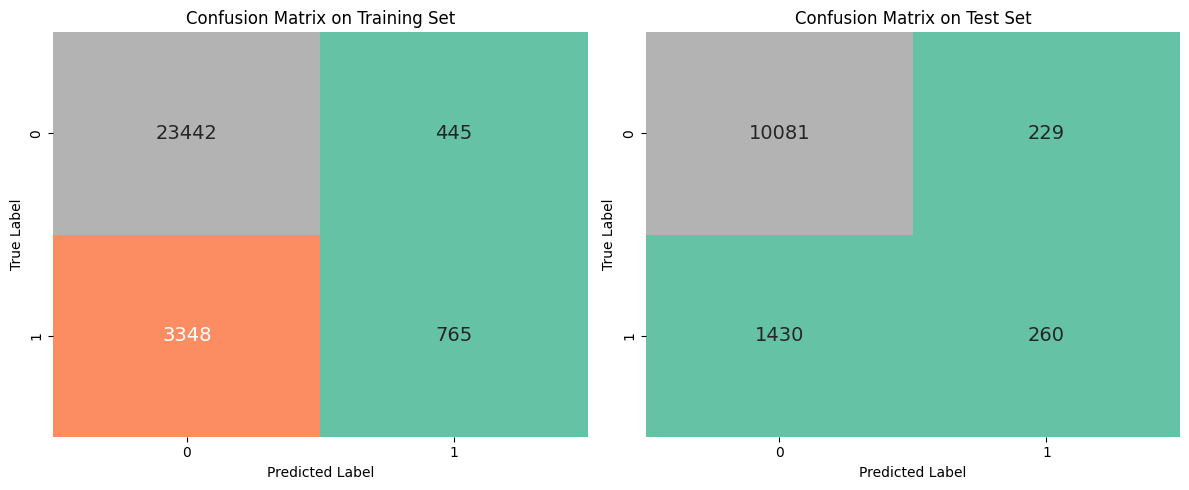

In [52]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=100)
# Training the classifier
lgbm_model.fit(X_train, y_train)
get_model_score(lgbm_model)

#### Observations:
- The training accuracy is **86.45%%** and the test accuracy is **86.18%%**.
- The training precision is lower, scoring only **63.22%%** indicating that this percentage of predicted positives are actually positive but this value is also less for the test set scoring only **53.17%**(almost equal to train score).
- The training recall is  **18.60%%** which is significantly low indicating the model was not able to identify the actual positives. The test recall is much lower only scoring **15.38%%** which is pretty low too.
- The F1 score for training is **28.74%**  and test F1 score is **23.86%**. indicating there is a presence of trade off between precision and recall for train and test.
- The testing performance metrics show a significant drop in performance compared to the training data. While accuracy is still relatively high, indicating that the model makes correct predictions for a large portion of the testing data, the precision, recall, and F1 score are considerably lower.
- The model is overfitting the training data but performing poorly for the testing data.
- Confusion matrix indicates the similar information as that of Precision, Recall and F1 score.

#### Feature Importance on LGBM

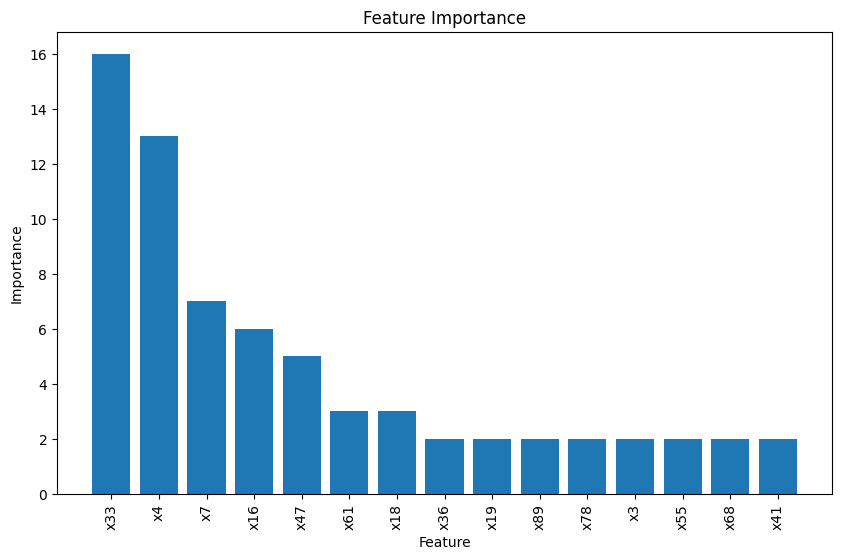

In [53]:
# Get feature importances
feature_importances = lgbm_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1][:15]
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(15),feature_importances[sorted_indices], align='center')
plt.xticks(range(15), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

#### Observations:
- From the plot we can say **'x33'** and **'x4'** contributes significantly to the LightGBM predictive model. The contribution percentage is **16%** and **13%** for **'x33'** and **'x4'** respectively.So, for the predictive model these two features are highly important.
- Features like **'x7'** , **'x16'** and **'x47'** are moderately important as they contribute in the range of **5%** to **7%**. 
- Although rest of the features contribute ranging from **3%** to **2.2%** , they are important too because even if their individual contribution is less but collectively they contribute substantially to the predictive model.
- From the plot, we can conclude that there is room for feature selection or dimensionality reduction.

#### Hyperparameter tuning for LGBM

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current versio

[LightGBM] [Info] Number of positive: 3290, number of negative: 19110
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22252
[LightGBM] [Info] Number of data points in the train set: 22400, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146875 -> initscore=-1.759324
[LightGBM] [Info] Start training from score -1.759324
[LightGBM] [Info] Number of positive: 3290, number of negative: 19110
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22251
[LightGBM] [Info] Number of data points in the train set: 22400, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146875 -> initscore=-1.759324
[LightGBM] [Info] Start training from score -1.759324


/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3290, number of negative: 19110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.293151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22252
[LightGBM] [Info] Number of data points in the train set: 22400, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146875 -> initscore=-1.759324
[LightGBM] [Info] Start training from score -1.759324
[LightGBM] [Info] Number of positive: 3290, number of negative: 19110
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22252
[LightGBM] [Info] Number of data points in the train set: 22400, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146875 -> initscore=-1.759324
[L

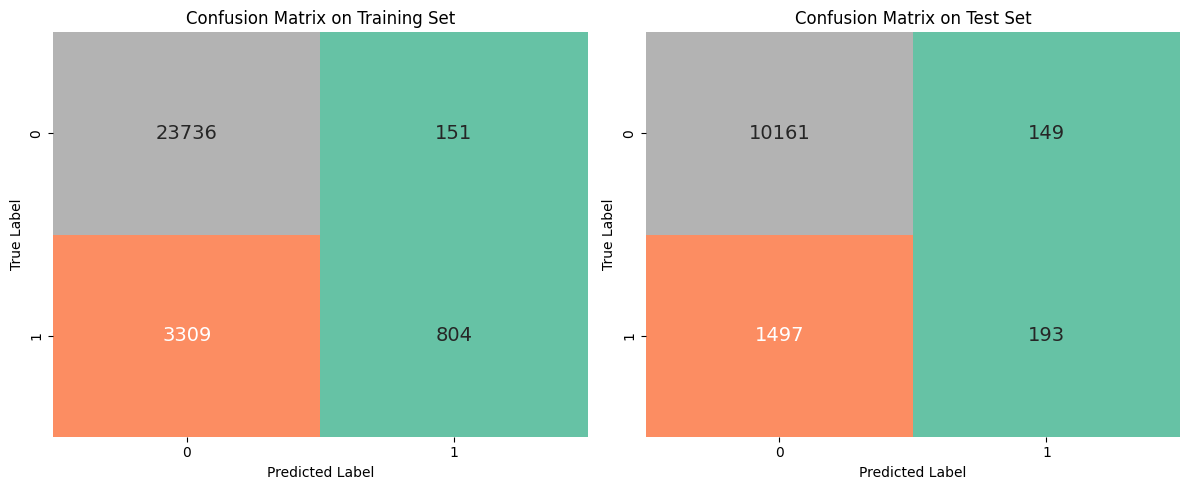

In [54]:
# Create a LightGBM model
lgb_tuned = LGBMClassifier()

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3, 1.0]
}

# Perform GridSearchCV for hyperparameter tuning
grid_obj = GridSearchCV(estimator=lgb_tuned, param_grid=param_grid, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_obj.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model obtained from GridSearchCV
lgb_tuned = grid_obj.best_estimator_

# Get the score of the tuned LightGBM model
best_model_score = get_model_score(lgb_tuned)

#### Observations after hyperparameter tuning:
- The training accuracy is **87.64%** and the test accuracy is **86.28%**.
- The training precision is **84.19%** indicating that the 84% predicted positives are actually positive, this value is also less for the test set scoring only **56.43%** got better after tuning.
- The training recall is  **19.55%** which got improved a little from **18.60%** after tuning not much significant. After tuning, the test recall also degraded to **11.42%** from **15.38%**.
- The F1 score for training is **31.73%** which is quite low while test F1 score is **18.99%** , degraded after tuning. 
- The testing performance metrics show a significant drop in performance compared to the training data. While accuracy is still relatively high, indicating that the model makes correct predictions for a large portion of the testing data, the precision, recall, and F1 score are considerably lower.
- The model is overfitting the training data but performing poorly for the testing data.
- Confusion matrix indicates the similar information as that of Precision, Recall and F1 score.

#### Feature Importance of tuned LGBM

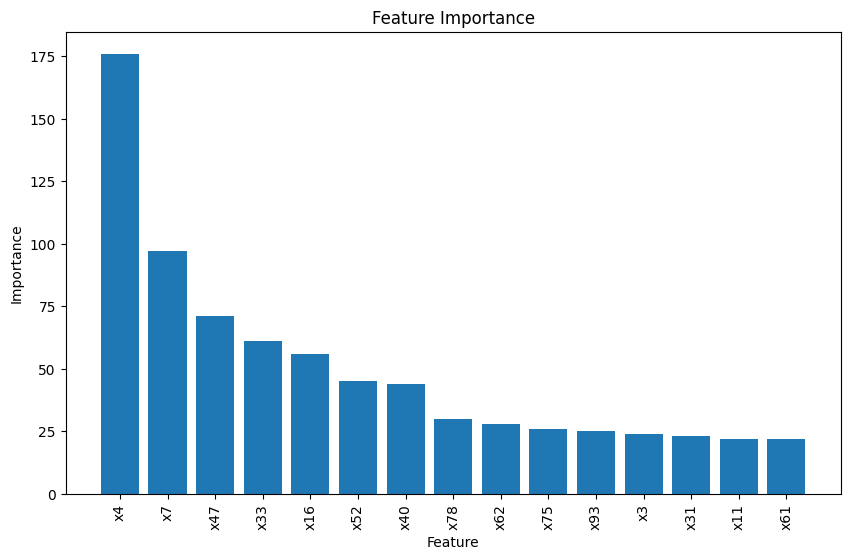

In [55]:
##Get feature importances
feature_importances = lgb_tuned.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1][:15]
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(15),feature_importances[sorted_indices], align='center')
plt.xticks(range(15), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

#### Observations:
- From the plot we can say the sugnificant feature didchange after tuning. It is  **'x4'** and **'x7'** contributing significantly to the tuned LightGBM predictive model.Previously it was **'x33'** and **'x4'**.
- The contribution percentage increased to **175%** for 'x4' from **13%** and **'x7'** increased to **100%** from **5-7%** range.
- Now **'x7'** became highly important feature along with **'x4'** contributing around **100%** and **175%**  respectively.
- Now **'x33'** became moderately important feature after tuning contributing around **60%** to the model.
- Features like **'x47'**,**'x33'**,**'x16'**,**'x52'** and **'x40'** are moderately important as they contribute around **50%** to **60%**.
- Although rest of the features contribution also increased in the range of  1.0% to 2.0% its not significant. These features are important too because even if their individual contribution is less but collectively they contribute substantially to the predictive model.
- From the plot, we can conclude that there is room for feature selection or dimensionality reduction.

### AUC-ROC Curve of all basic models 

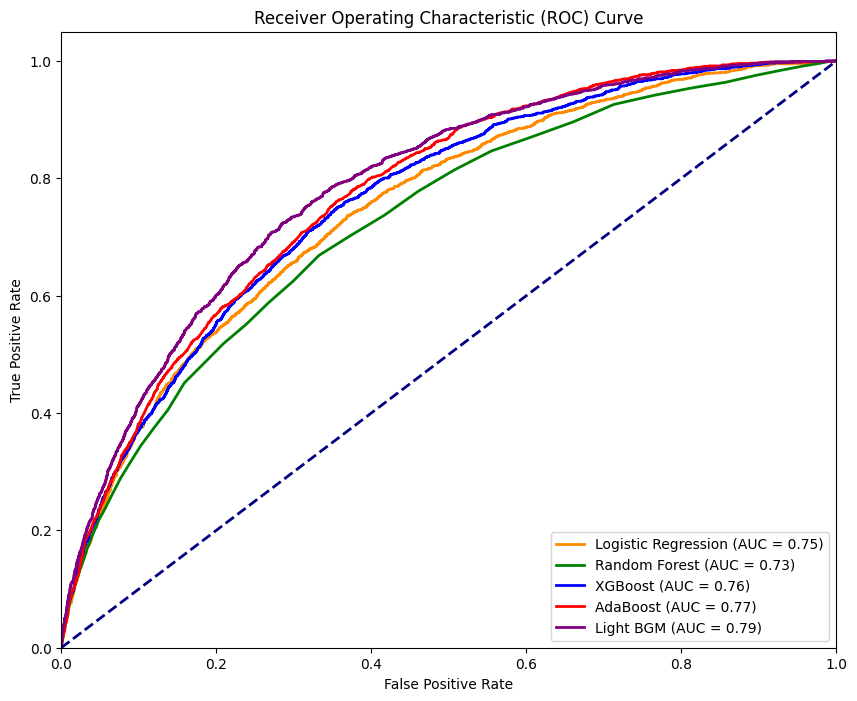

In [56]:
from sklearn.metrics import roc_curve, auc

# Assuming you have models named logistic_model, random_forest_model, xgboost_model, adaboost_model, gradient_boost_model


# Predict probabilities
logistic_probs = logistic_regression_model.predict_proba(X_test)[:, 1]
random_forest_probs = random_forest_model.predict_proba(X_test)[:, 1]
xgboost_probs = xg_boost_model.predict_proba(X_test)[:, 1]
adaboost_probs = ada_boost_model.predict_proba(X_test)[:, 1]
lgb_boost_probs = lgbm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_probs)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, random_forest_probs)
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, xgboost_probs)
roc_auc_xgboost = auc(fpr_xgboost, tpr_xgboost)

fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, adaboost_probs)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_boost_probs)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_random_forest, tpr_random_forest, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_random_forest)
plt.plot(fpr_xgboost, tpr_xgboost, color='blue', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgboost)
plt.plot(fpr_adaboost, tpr_adaboost, color='red', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_adaboost)
plt.plot(fpr_lgb, tpr_lgb, color='purple', lw=2, label='Light BGM (AUC = %0.2f)' % roc_auc_lgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Observations:
- AUC values closer to 1 generally indicate better model performance.
- As can be seen from the plot, LightGBM performs well than other model having an AUC value of **0.79**.
- Although the differences are not significant among the AUC values of other models, but this difference can be significant in statistical analysis.
- So here we can say that **LightGBM** performs well reflecting good discriminative ability that is to distinguish between 1 and 0 classes.

### AUC-ROC curve of all tuned models

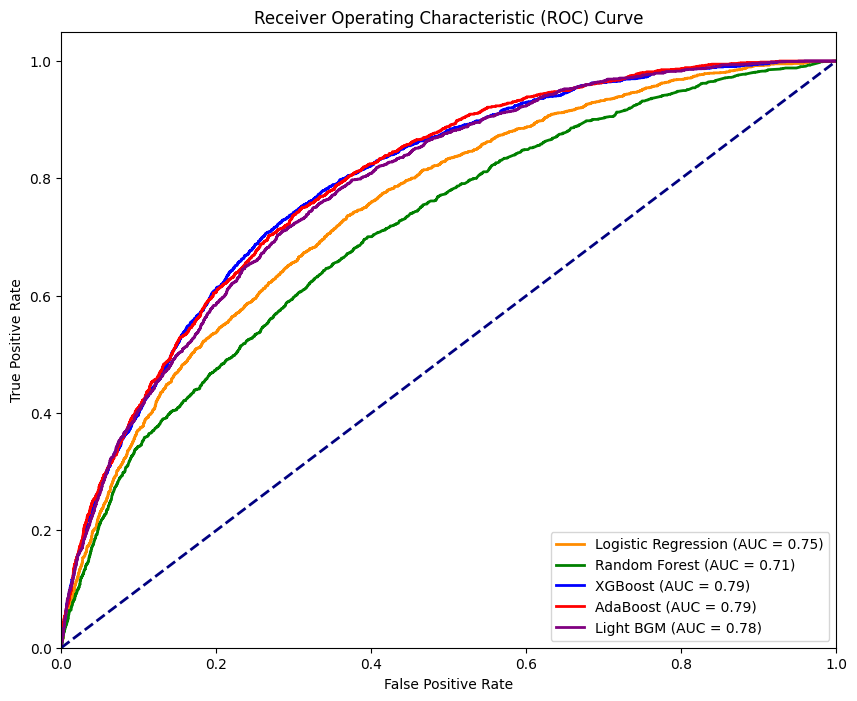

In [57]:
from sklearn.metrics import roc_curve, auc

# Assuming you have models named logistic_model, random_forest_model, xgboost_model, adaboost_model, gradient_boost_model


# Predict probabilities
logistic_probs = logistic_regression_tuned.predict_proba(X_test)[:, 1]
random_forest_probs = random_forest_tuned.predict_proba(X_test)[:, 1]
xgboost_probs = xgb_tuned.predict_proba(X_test)[:, 1]
adaboost_probs = ada_boost_tuned.predict_proba(X_test)[:, 1]
lgb_boost_probs = lgb_tuned.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_probs)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, random_forest_probs)
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, xgboost_probs)
roc_auc_xgboost = auc(fpr_xgboost, tpr_xgboost)

fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, adaboost_probs)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_boost_probs)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_random_forest, tpr_random_forest, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_random_forest)
plt.plot(fpr_xgboost, tpr_xgboost, color='blue', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgboost)
plt.plot(fpr_adaboost, tpr_adaboost, color='red', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_adaboost)
plt.plot(fpr_lgb, tpr_lgb, color='purple', lw=2, label='Light BGM (AUC = %0.2f)' % roc_auc_lgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Observations:

#### Observations:
- AUC values closer to 1 generally indicate better model performance.
- After tuning as can be seen from the plot, XGBoost and Adaboost performs well than other model having an AUC value of **0.79**.
- Although the differences are not significant among the AUC values of other models, but this difference can be significant in statistical analysis.
- So here we can say that **XgBoost** and **AdaBoost** performs well reflecting good discriminative ability that is to distinguish between 1 and 0 classes.

#### Conclusion:
- In this classification problem , implemented **5** classifiers namely **Logistic Regression**, **Random Forest Classifier**, **XgBoost Classifier**, **AdaBoost Classifier** and **LightGBM Classifier**.
- Compared the results of Basic models and tuned models but did not find any significant improvement.
- The models were overfitting in training dataset but performed poorly on test data set even after Hyperparameter tuning.
- There can be several reasons like imbalanced dataset, the observation in test dataset might be more challenging than the training dataset for the model to predict, convergence issues, high dimensionality, poor feature Engineering etc.

## <center> <span style="color:magenta"> The End! 😄 </span>  </center> 